In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score  # Import accuracy_score to evaluate model
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Load the CSV file
lotto_data = pd.read_csv("lotto_data_1_to_1148.csv")

# Split 'Numbers' column into individual columns
numbers_df = pd.DataFrame(lotto_data['Numbers'].apply(eval).tolist(), columns=['Number1', 'Number2', 'Number3', 'Number4', 'Number5', 'Number6'])

# Merge the split columns back to the original DataFrame
lotto_data = pd.concat([lotto_data, numbers_df], axis=1)

# Drop the original 'Numbers' column
lotto_data.drop(columns=['Numbers'], inplace=True)

# Original (Non-scaled) data preparation
original_data = lotto_data.copy()  # Keep the original data for non-scaled processing

# Prepare scaled data using MinMaxScaler
scaler = MinMaxScaler()  # Initialize the MinMaxScaler
scaled_data = lotto_data.copy()  # Copy the original data for scaling
scaled_data[['Number1', 'Number2', 'Number3', 'Number4', 'Number5', 'Number6']] = scaler.fit_transform(
    scaled_data[['Number1', 'Number2', 'Number3', 'Number4', 'Number5', 'Number6']]
)  # Apply scaling to the number columns

# Split non-scaled data into training and testing sets
X_original = original_data[['Number1', 'Number2', 'Number3', 'Number4', 'Number5', 'Number6']]  # Features for non-scaled
y_original = original_data['Bonus']  # Target for non-scaled
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(
    X_original, y_original, test_size=0.2, random_state=42  # 80% training, 20% testing
)

# Split scaled data into training and testing sets
X_scaled = scaled_data[['Number1', 'Number2', 'Number3', 'Number4', 'Number5', 'Number6']]  # Features for scaled
y_scaled = scaled_data['Bonus']  # Target for scaled
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42  # 80% training, 20% testing
)

# Non-scaled Data

## Random Forest

In [18]:
# Random Forest with Non-scaled Data
rf_original = RandomForestClassifier(random_state=42)  # Initialize Random Forest
rf_original.fit(X_train_original, y_train_original)  # Train the model
y_pred_original = rf_original.predict(X_test_original)  # Predict on test data
accuracy_original = accuracy_score(y_test_original, y_pred_original)  # Calculate accuracy
print("Random Forest Accuracy (Non-scaled Data):", accuracy_original)

Random Forest Accuracy (Non-scaled Data): 0.034782608695652174


In [19]:
# Random Forest with Scaled Data
rf_scaled = RandomForestClassifier(random_state=42)  # Initialize Random Forest
rf_scaled.fit(X_train_scaled, y_train_scaled)  # Train the model
y_pred_scaled = rf_scaled.predict(X_test_scaled)  # Predict on test data
accuracy_scaled = accuracy_score(y_test_scaled, y_pred_scaled)  # Calculate accuracy
print("Random Forest Accuracy (Scaled Data):", accuracy_scaled)

Random Forest Accuracy (Scaled Data): 0.030434782608695653


In [20]:
# Train Random Forest (assuming X_train_original, y_train_original are defined)
rf_original = RandomForestClassifier(random_state=42)
rf_original.fit(X_train_original, y_train_original)  # Train the model with training data

# Example of new input data (replace with recent numbers)
next_round_input = [[3, 11, 16, 23, 29, 33]]  # Example: 1148회 당첨 번호

# Predict the next bonus number
predicted_bonus = rf_original.predict(next_round_input)

# Generate 6 random numbers using uniform probability
# Since feature importance does not cover all 45 numbers, we use a uniform distribution
predicted_numbers = np.random.choice(range(1, 46), size=6, replace=False)
predicted_numbers.sort()  # Sort numbers for better readability

print("Random Forest Accuracy (Non-scaled Data):", accuracy_original)
print("Predicted Numbers for the Next Round:", predicted_numbers)
print("Predicted Bonus Number for the Next Round:", predicted_bonus[0])

Random Forest Accuracy (Non-scaled Data): 0.034782608695652174
Predicted Numbers for the Next Round: [ 4  9 21 27 28 35]
Predicted Bonus Number for the Next Round: 24


c:\Users\godsj\miniconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## XGBoost

In [21]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

In [22]:
# Adjust the target values to start from 0
y_train_adjusted = y_train_original - 1
y_test_adjusted = y_test_original - 1

In [23]:
# Train XGBoost for Bonus Number
xgb_bonus = XGBClassifier(random_state=42, eval_metric='mlogloss')  # Initialize XGBoost
xgb_bonus.fit(X_train_original, y_train_adjusted)  # Train the model
y_pred_bonus = xgb_bonus.predict(X_test_original) + 1  # Adjust predictions back to original range
accuracy_bonus = accuracy_score(y_test_original, y_pred_bonus)  # Calculate accuracy


In [24]:
# Predict Bonus Number for the Next Round
next_round_input = [[3, 11, 16, 23, 29, 33]]  # Example input: 1148회 당첨 번호
predicted_bonus = xgb_bonus.predict(next_round_input) + 1  # Adjust back to original range

print("XGBoost Accuracy (Bonus Number):", accuracy_bonus)
print("Predicted Bonus Number for the Next Round:", predicted_bonus[0])

XGBoost Accuracy (Bonus Number): 0.04782608695652174
Predicted Bonus Number for the Next Round: 21


# Scaled Data

## Support Vector Machine (SVM)

In [35]:
# SVM with Scaled Data
svm_model = SVC(random_state=42)  # Initialize SVM
svm_model.fit(X_train_scaled, y_train_scaled)  # Train the model
y_pred_svm = svm_model.predict(X_test_scaled)  # Predict on test data
accuracy_svm = accuracy_score(y_test_scaled, y_pred_svm)  # Calculate accuracy
print("SVM Accuracy (Scaled Data):", accuracy_svm)

SVM Accuracy (Scaled Data): 0.021739130434782608


## K-Nearest Neighbors (KNN)

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Train KNN on Scaled Data
knn = KNeighborsClassifier(n_neighbors=5)  # Initialize KNN with 5 neighbors
knn.fit(X_train_scaled, y_train_scaled)  # Train the model

# Test KNN on the test set
y_pred_knn = knn.predict(X_test_scaled)  # Predict on test data
accuracy_knn = accuracy_score(y_test_scaled, y_pred_knn)  # Calculate accuracy
print("KNN Accuracy (Scaled Data):", accuracy_knn)  # Print accuracy

# Predict the next bonus number
# Example of new input data (replace with the latest winning numbers)
next_round_input = [[3, 11, 16, 23, 29, 33]]  # Example: 1148회 당첨 번호
predicted_bonus = knn.predict(next_round_input)  # Predict the bonus number for the next round
print("Predicted Bonus Number for the Next Round:", predicted_bonus[0])  # Print bonus number

# Generate 6 random numbers using uniform distribution (simulate lotto number prediction)
predicted_numbers = np.random.choice(range(1, 46), size=6, replace=False)  # Generate 6 numbers
predicted_numbers.sort()  # Sort for better readability
print("Predicted Numbers for the Next Round:", predicted_numbers)  # Print 6 predicted numbers

KNN Accuracy (Scaled Data): 0.043478260869565216
Predicted Bonus Number for the Next Round: 9
Predicted Numbers for the Next Round: [ 4  5  9 40 42 45]


c:\Users\godsj\miniconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


## Gradient Boosting (XGBoost)

In [48]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Adjust the target values to start from 0
y_train_adjusted = y_train - 1
y_test_adjusted = y_test - 1

# Train XGBoost Classifier for Bonus Number Prediction
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train_adjusted)

# Predict Bonus Numbers (adjusted back to original range)
y_pred = xgb.predict(X_test) + 1  # Add 1 to restore the original range
accuracy = accuracy_score(y_test, y_pred)
print("XGBoost Accuracy (Bonus Number):", accuracy)

# Predict next bonus number (adjusted input)
next_round_input = [[3, 11, 16, 23, 29, 33]]  # Example input: 1148회 당첨 번호
predicted_bonus = xgb.predict(next_round_input) + 1  # Adjust back to original range
print("Predicted Bonus Number for the Next Round:", predicted_bonus[0])

# Generate 6 random numbers for the next round
predicted_numbers = np.random.choice(range(1, 46), size=6, replace=False)
predicted_numbers.sort()
print("Predicted Numbers for the Next Round:", predicted_numbers)

XGBoost Accuracy (Bonus Number): 0.04782608695652174
Predicted Bonus Number for the Next Round: 32
Predicted Numbers for the Next Round: [12 14 20 30 36 40]


# Combining PCA and Random Forest for Lotto Number Prediction

In [1]:
# Import necessary libraries
from sklearn.decomposition import PCA  # For dimensionality reduction
from sklearn.ensemble import RandomForestClassifier  # For supervised learning
from sklearn.metrics import accuracy_score  # For evaluating model performance
from sklearn.model_selection import train_test_split  # For splitting the data
import numpy as np

In [ ]:
# 1. PCA를 사용하여 데이터의 주요 특징 추출
# Apply PCA to extract the most important features
pca = PCA(n_components=3)  # Reduce data to 3 principal components
pca_features = pca.fit_transform(X_original)  # Fit and transform the original data

In [5]:
# Combine original features with PCA features
X_with_pca = np.hstack([X_original, pca_features])  # Append PCA features to original data

In [ ]:
# 2. Random Forest를 사용하여 각 번호(1~6)를 예측
# Initialize lists to store predicted numbers and accuracies
predicted_numbers = []
accuracies = []

In [9]:
next_round_input = np.array([[3, 11, 16, 23, 29, 33]])  # Replace with recent winning numbers

In [10]:
for i in range(1, 7):
    # Set the target for the current number
    y = original_data[f'Number{i}'].astype(int)  # Extract target column
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X_with_pca, y, test_size=0.2, random_state=42
    )

    # Train a Random Forest model
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, y_train)

    # Predict and calculate accuracy on the test set
    y_pred = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # Predict the next number using PCA-transformed input
    next_round_input_with_pca = np.hstack([next_round_input, pca.transform(next_round_input)])  # Add PCA features
    predicted_number = rf_model.predict(next_round_input_with_pca)
    predicted_numbers.append(predicted_number[0])  # Store the predicted number

c:\Users\godsj\miniconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\Users\godsj\miniconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\Users\godsj\miniconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\Users\godsj\miniconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\Users\godsj\miniconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\Users\godsj\miniconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature nam

In [12]:
# Display the results
# Convert NumPy int64 predictions to Python int for better readability
predicted_numbers = [int(num) for num in predicted_numbers]  # Convert np.int64 to int

# Print accuracies and predicted numbers
print("Random Forest Accuracies with PCA for Each Number:", accuracies)
print("Predicted Numbers for the Next Round:", predicted_numbers)

Random Forest Accuracies with PCA for Each Number: [0.9260869565217391, 0.9260869565217391, 0.9260869565217391, 0.9304347826086956, 0.9304347826086956, 0.8956521739130435, 0.8826086956521739, 0.8652173913043478]
Predicted Numbers for the Next Round: [3, 11, 16, 23, 29, 33]


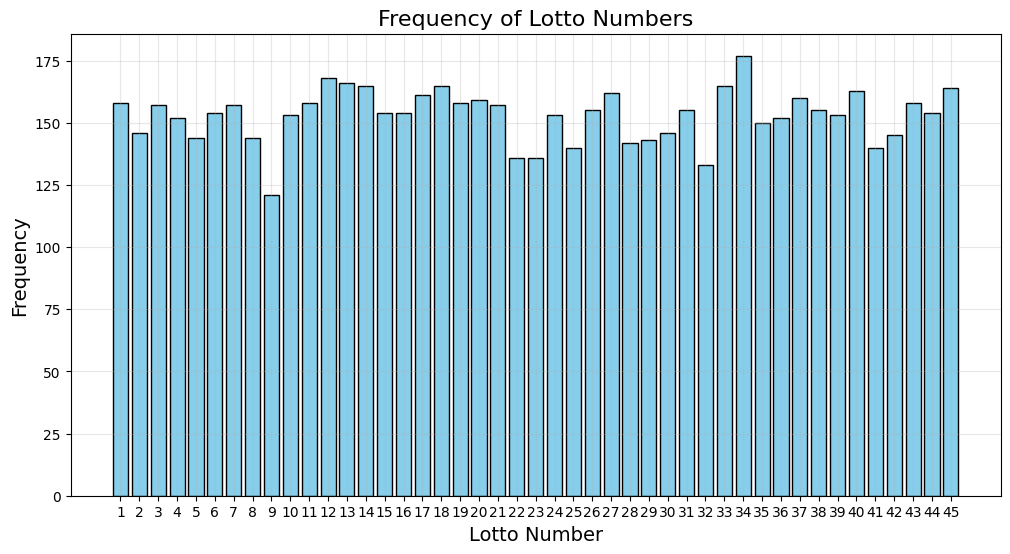

In [16]:
# Count the frequency of each number in the original data
number_counts = np.zeros(45)  # Array to store counts for numbers 1 to 45
for i in range(1, 7):  # Loop through Number1 to Number6
    number_counts += np.bincount(original_data[f'Number{i}'], minlength=46)[1:]

# Plot the frequency of each number
plt.figure(figsize=(12, 6))
plt.bar(range(1, 46), number_counts, color='skyblue', edgecolor='black')
plt.title("Frequency of Lotto Numbers", fontsize=16)
plt.xlabel("Lotto Number", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(range(1, 46))
plt.grid(alpha=0.3)
plt.show()